Training set (50000, 784) (50000, 784)
Validation set (10000, 784) (10000, 784)
Test set (10000, 784) (10000, 784)


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7509 - loss: 48.5180 - val_accuracy: 0.9016 - val_loss: 0.6004
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9296 - loss: 0.3550 - val_accuracy: 0.9239 - val_loss: 0.4590
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9518 - loss: 0.2144 - val_accuracy: 0.9319 - val_loss: 0.3971
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9655 - loss: 0.1287 - val_accuracy: 0.9342 - val_loss: 0.3776
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9755 - loss: 0.0911 - val_accuracy: 0.9405 - val_loss: 0.3527


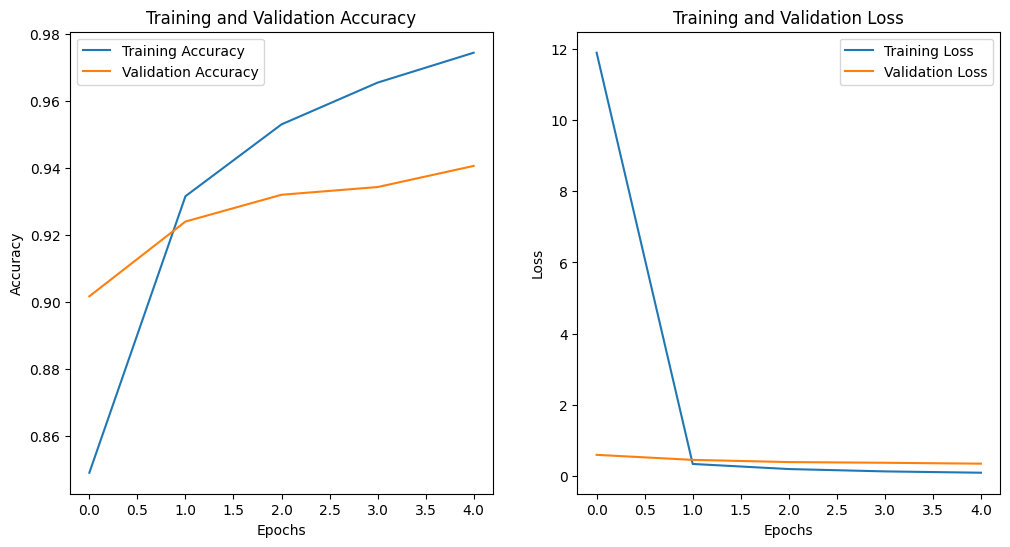

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9296 - loss: 0.4089  
Test accuracy: 94.0%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


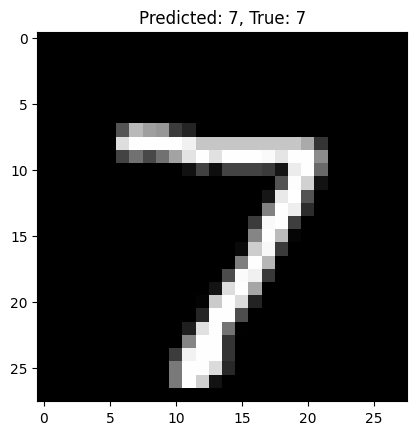

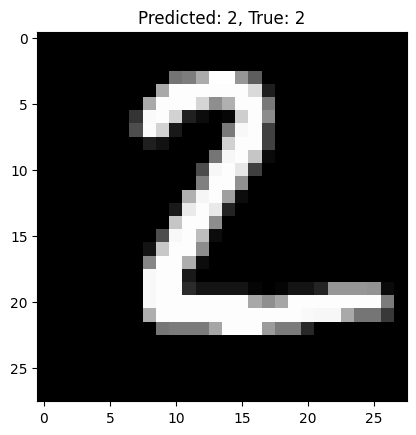

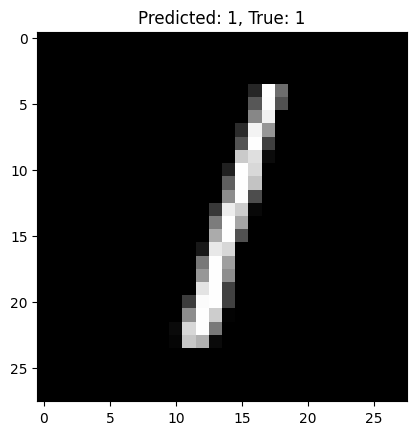

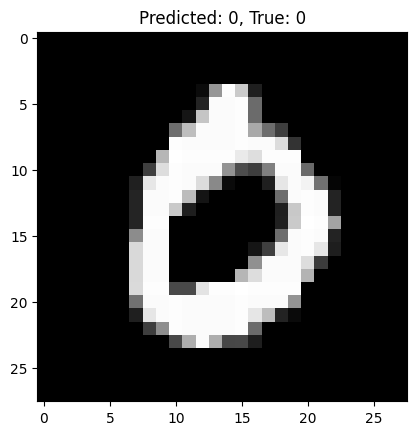

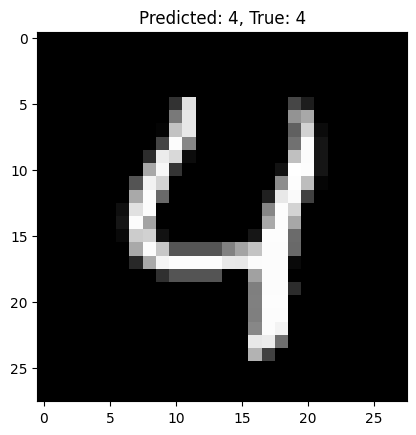

In [3]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Tải bộ dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Chia bộ dữ liệu thành tập huấn luyện và tập kiểm tra
np.random.seed(0)
train_indices = np.random.choice(60000, 50000, replace=False)
valid_indices = [i for i in range(60000) if i not in train_indices]
X_valid, y_valid = X_train[valid_indices,:,:], y_train[valid_indices]
X_train, y_train = X_train[train_indices,:,:], y_train[train_indices]

# Chuẩn hóa dữ liệu và làm phẳng các ảnh thành vector
image_size = 28
num_labels = 10

def reformat(dataset, labels):
    dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return dataset, labels

X_train, y_train = reformat(X_train, y_train)
X_valid, y_valid = reformat(X_valid, y_valid)
X_test, y_test = reformat(X_test, y_test)

print('Training set', X_train.shape, X_train.shape)
print('Validation set', X_valid.shape, X_valid.shape)
print('Test set', X_test.shape, X_test.shape)

# Định nghĩa hàm accuracy
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
            / predictions.shape[0])

# Khởi tạo các tham số
batch_size = 256
num_hidden_units = 1024
lambda1 = 0.05  # Hệ số L2 regularization cho weights1
lambda2 = 0.05  # Hệ số L2 regularization cho weights2

# Xây dựng mô hình Keras (Fully Connected Neural Network)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_hidden_units, activation='relu', input_shape=(image_size * image_size,)),
    tf.keras.layers.Dense(num_labels, activation='softmax')
])

# Biên dịch mô hình
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.003),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_valid, y_valid))

# Vẽ biểu đồ loss và accuracy
plt.figure(figsize=(12, 6))

# Biểu đồ Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Biểu đồ Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Đánh giá mô hình trên tập test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.1f}%")

# Hiển thị một số dự đoán từ mô hình
predictions = model.predict(X_test)

# Hiển thị một vài ảnh và dự đoán
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {np.argmax(y_test[i])}")
    plt.show()
